In [6]:
import tensorflow as tf
tf.keras.backend.clear_session()

# ResNet50 Evaluation

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
# ✅ CONFIG
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
VALID_DIR = "../data/valid"
EVAL_DIR = "Evaluation_report"
os.makedirs(EVAL_DIR, exist_ok=True)


In [9]:
# ✅ Data Generator
val_gen = ImageDataGenerator(rescale=1./255)
val_loader = val_gen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 17572 images belonging to 38 classes.


In [10]:
# Load Model
resnet_model_path = r"D:\Crop_disease_detection\models\resnet50\model_resnet50\best_model_resnet50.h5"
model = load_model(resnet_model_path)


In [11]:
# ✅ Evaluation
true_labels = val_loader.classes
class_names = list(val_loader.class_indices.keys())
pred_probs = model.predict(val_loader)
pred_labels = np.argmax(pred_probs, axis=1)


d:\Crop_disease_detection\py.3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


550/550 ━━━━━━━━━━━━━━━━━━━━ 1440s 3s/step


In [16]:
# ✅ Classification Report
report = classification_report(true_labels, pred_labels, target_names=class_names, digits=4)
print(report)
fig, ax = plt.subplots(figsize=(14, len(class_names) * 0.35))
ax.axis('off')
ax.text(0.01, 1.0, f"Classification Report for ResNet50\n\n" + report, {'fontsize': 9}, fontproperties='monospace')
plt.tight_layout()
plt.savefig(os.path.join(EVAL_DIR, "classification_report_resnet50.png"))
plt.close()



                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     0.9980    1.0000    0.9990       504
                                 Apple___Black_rot     1.0000    1.0000    1.0000       497
                          Apple___Cedar_apple_rust     1.0000    1.0000    1.0000       440
                                   Apple___healthy     0.9747    0.9960    0.9852       502
                               Blueberry___healthy     0.9978    0.9780    0.9878       454
          Cherry_(including_sour)___Powdery_mildew     1.0000    0.9905    0.9952       421
                 Cherry_(including_sour)___healthy     1.0000    0.9978    0.9989       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.9785    1.0000    0.9891       410
                       Corn_(maize)___Common_rust_     1.0000    1.0000    1.0000       477
               Corn_(maize)___Northern_Leaf_Blight     1.0000    0.9811    0.99

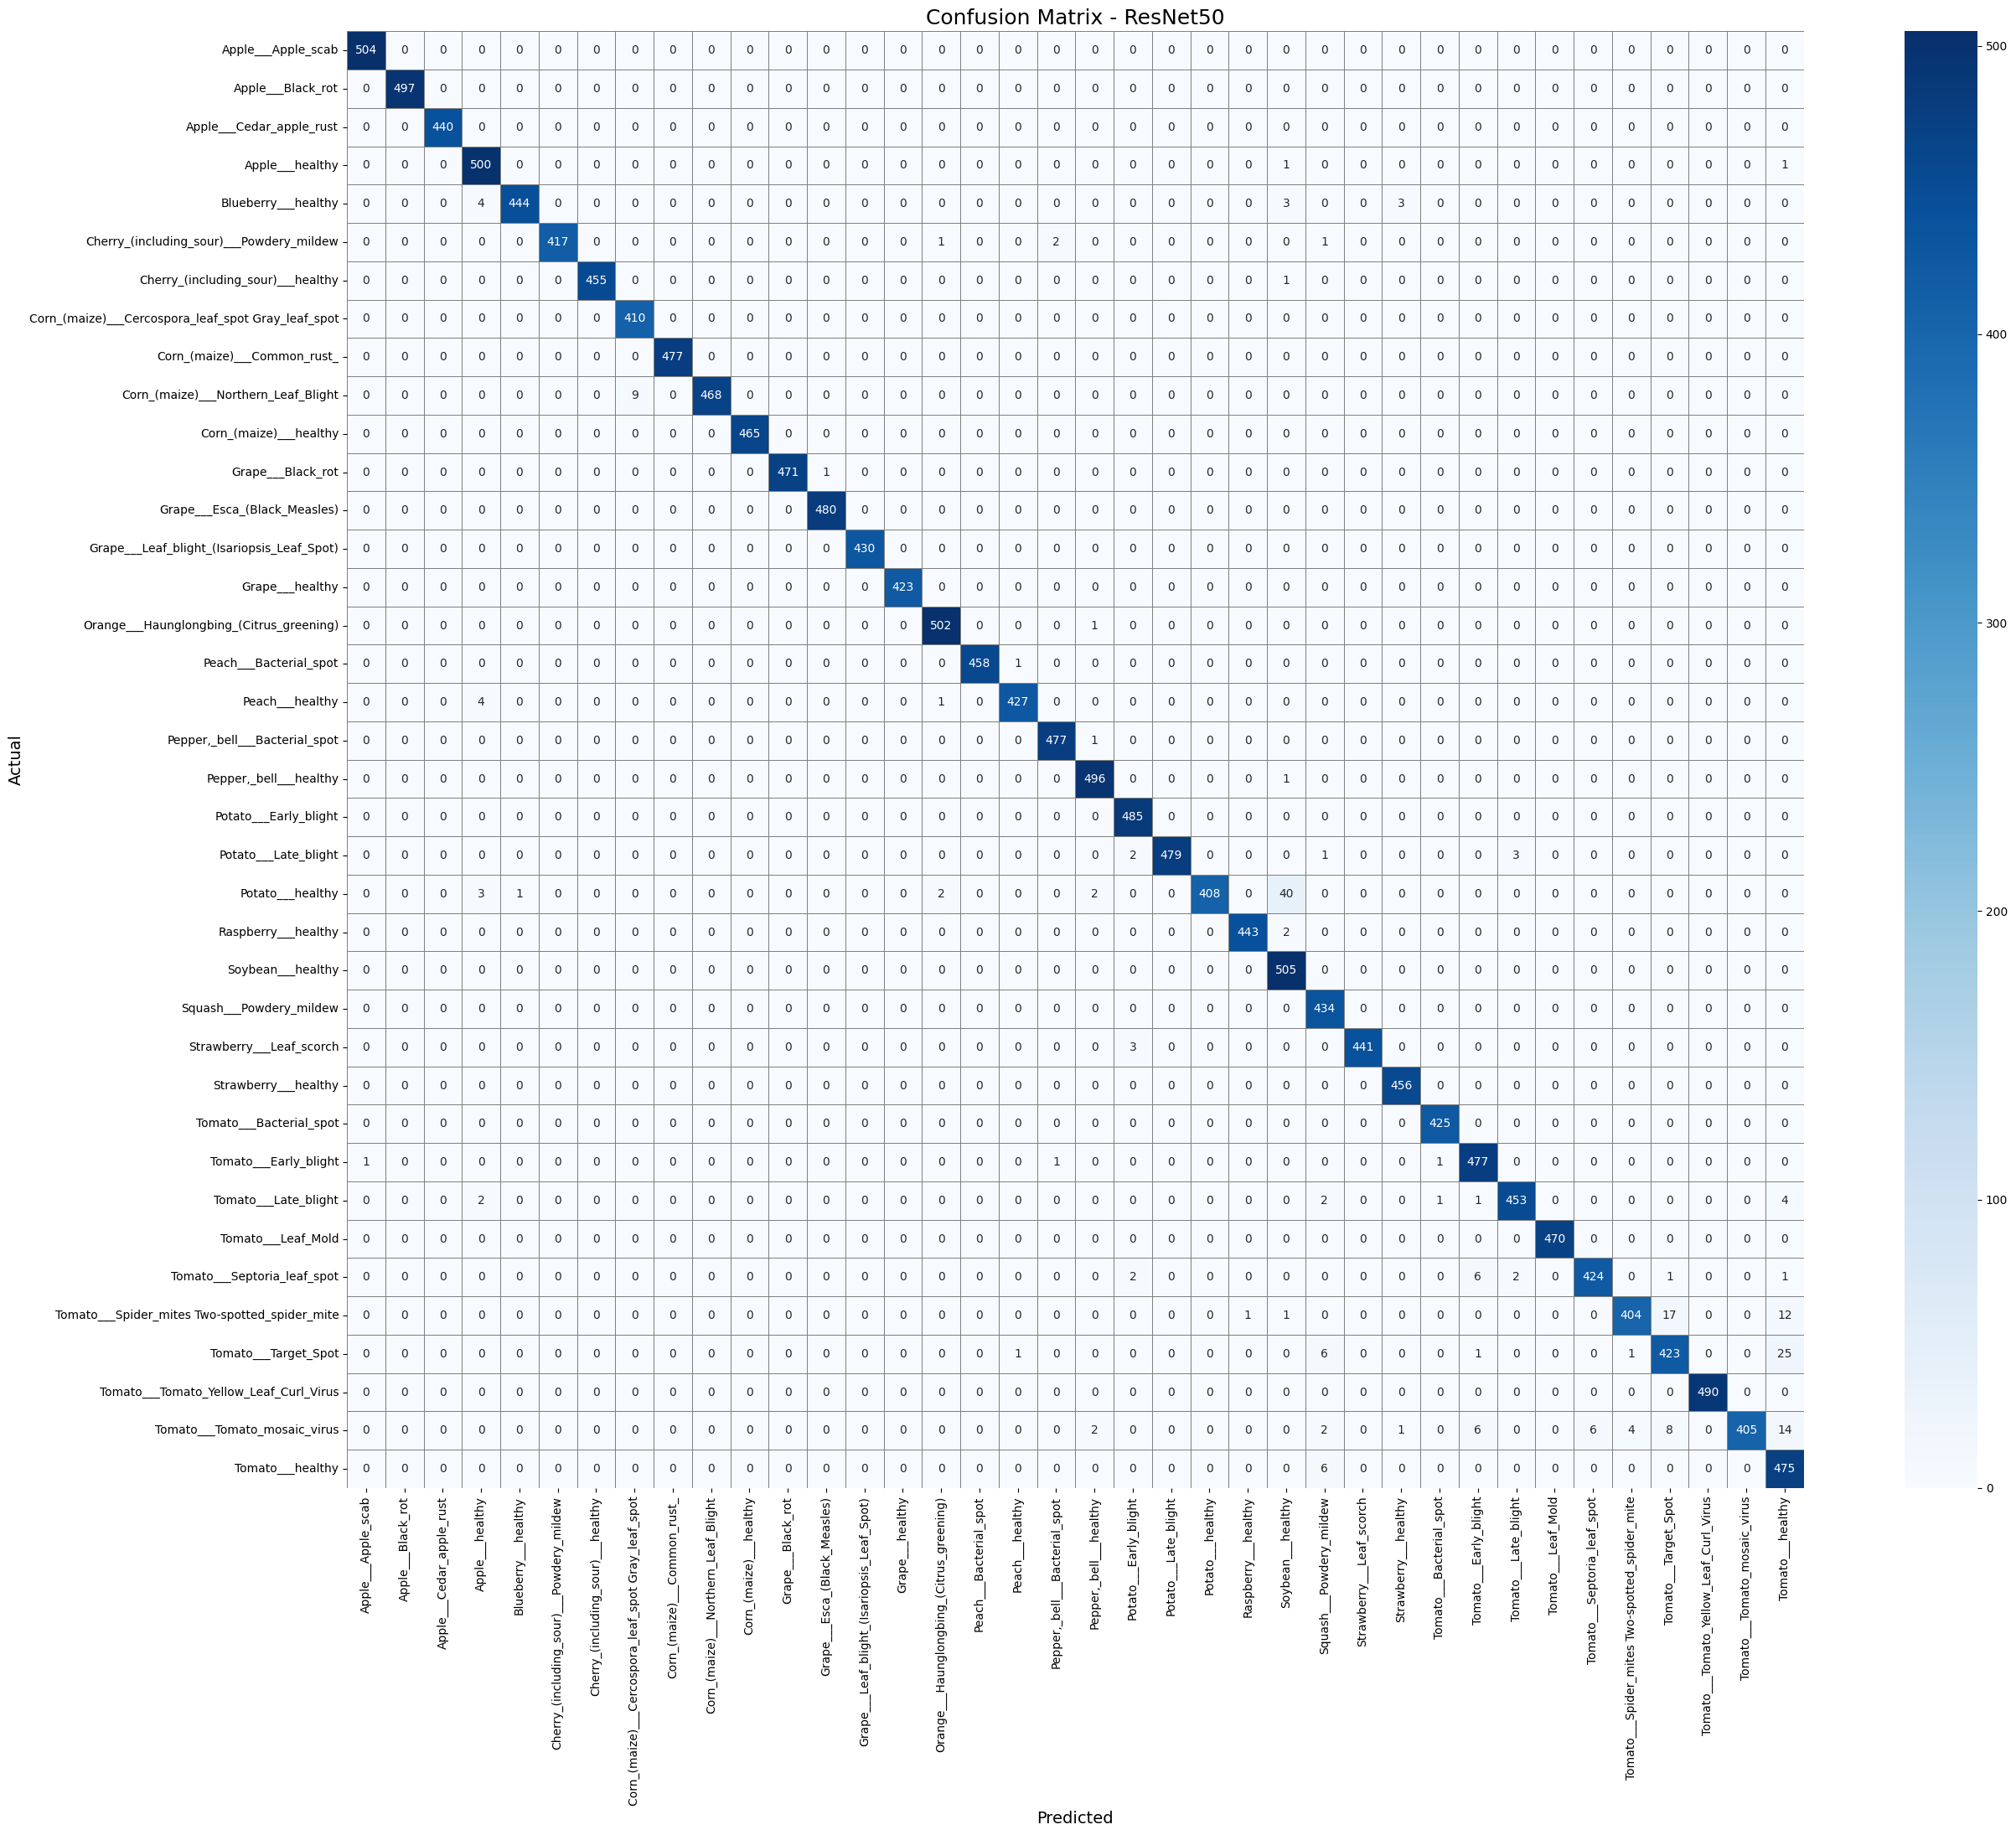

In [17]:
# ✅ Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(28, 22))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix - ResNet50", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(EVAL_DIR, "confusion_matrix_resnet50.png"))
plt.show()

# MobileNetV2 Evaluation 

In [18]:
# Load Model
MobileNetV2_model_path = r"D:\Crop_disease_detection\models\MobileNetV2\model_MobileNetV2\best_model_mobilenetv2.h5"
model = load_model(MobileNetV2_model_path)


In [19]:
# ✅ Evaluation
true_labels = val_loader.classes
class_names = list(val_loader.class_indices.keys())
pred_probs = model.predict(val_loader)
pred_labels = np.argmax(pred_probs, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 523s 944ms/step


In [20]:
# ✅ Classification Report
report = classification_report(true_labels, pred_labels, target_names=class_names, digits=4)
print(report)
fig, ax = plt.subplots(figsize=(14, len(class_names) * 0.35))
ax.axis('off')
ax.text(0.01, 1.0, f"Classification Report for MobileNetV2\n\n" + report, {'fontsize': 9}, fontproperties='monospace')
plt.tight_layout()
plt.savefig(os.path.join(EVAL_DIR, "classification_report_mobilenetv2.png"))
plt.close()

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     0.9862    0.9901    0.9881       504
                                 Apple___Black_rot     0.9783    1.0000    0.9891       497
                          Apple___Cedar_apple_rust     1.0000    0.9977    0.9989       440
                                   Apple___healthy     0.9980    0.9920    0.9950       502
                               Blueberry___healthy     1.0000    0.9978    0.9989       454
          Cherry_(including_sour)___Powdery_mildew     1.0000    0.9952    0.9976       421
                 Cherry_(including_sour)___healthy     1.0000    1.0000    1.0000       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.9638    0.9732    0.9684       410
                       Corn_(maize)___Common_rust_     1.0000    1.0000    1.0000       477
               Corn_(maize)___Northern_Leaf_Blight     0.9768    0.9706    0.97

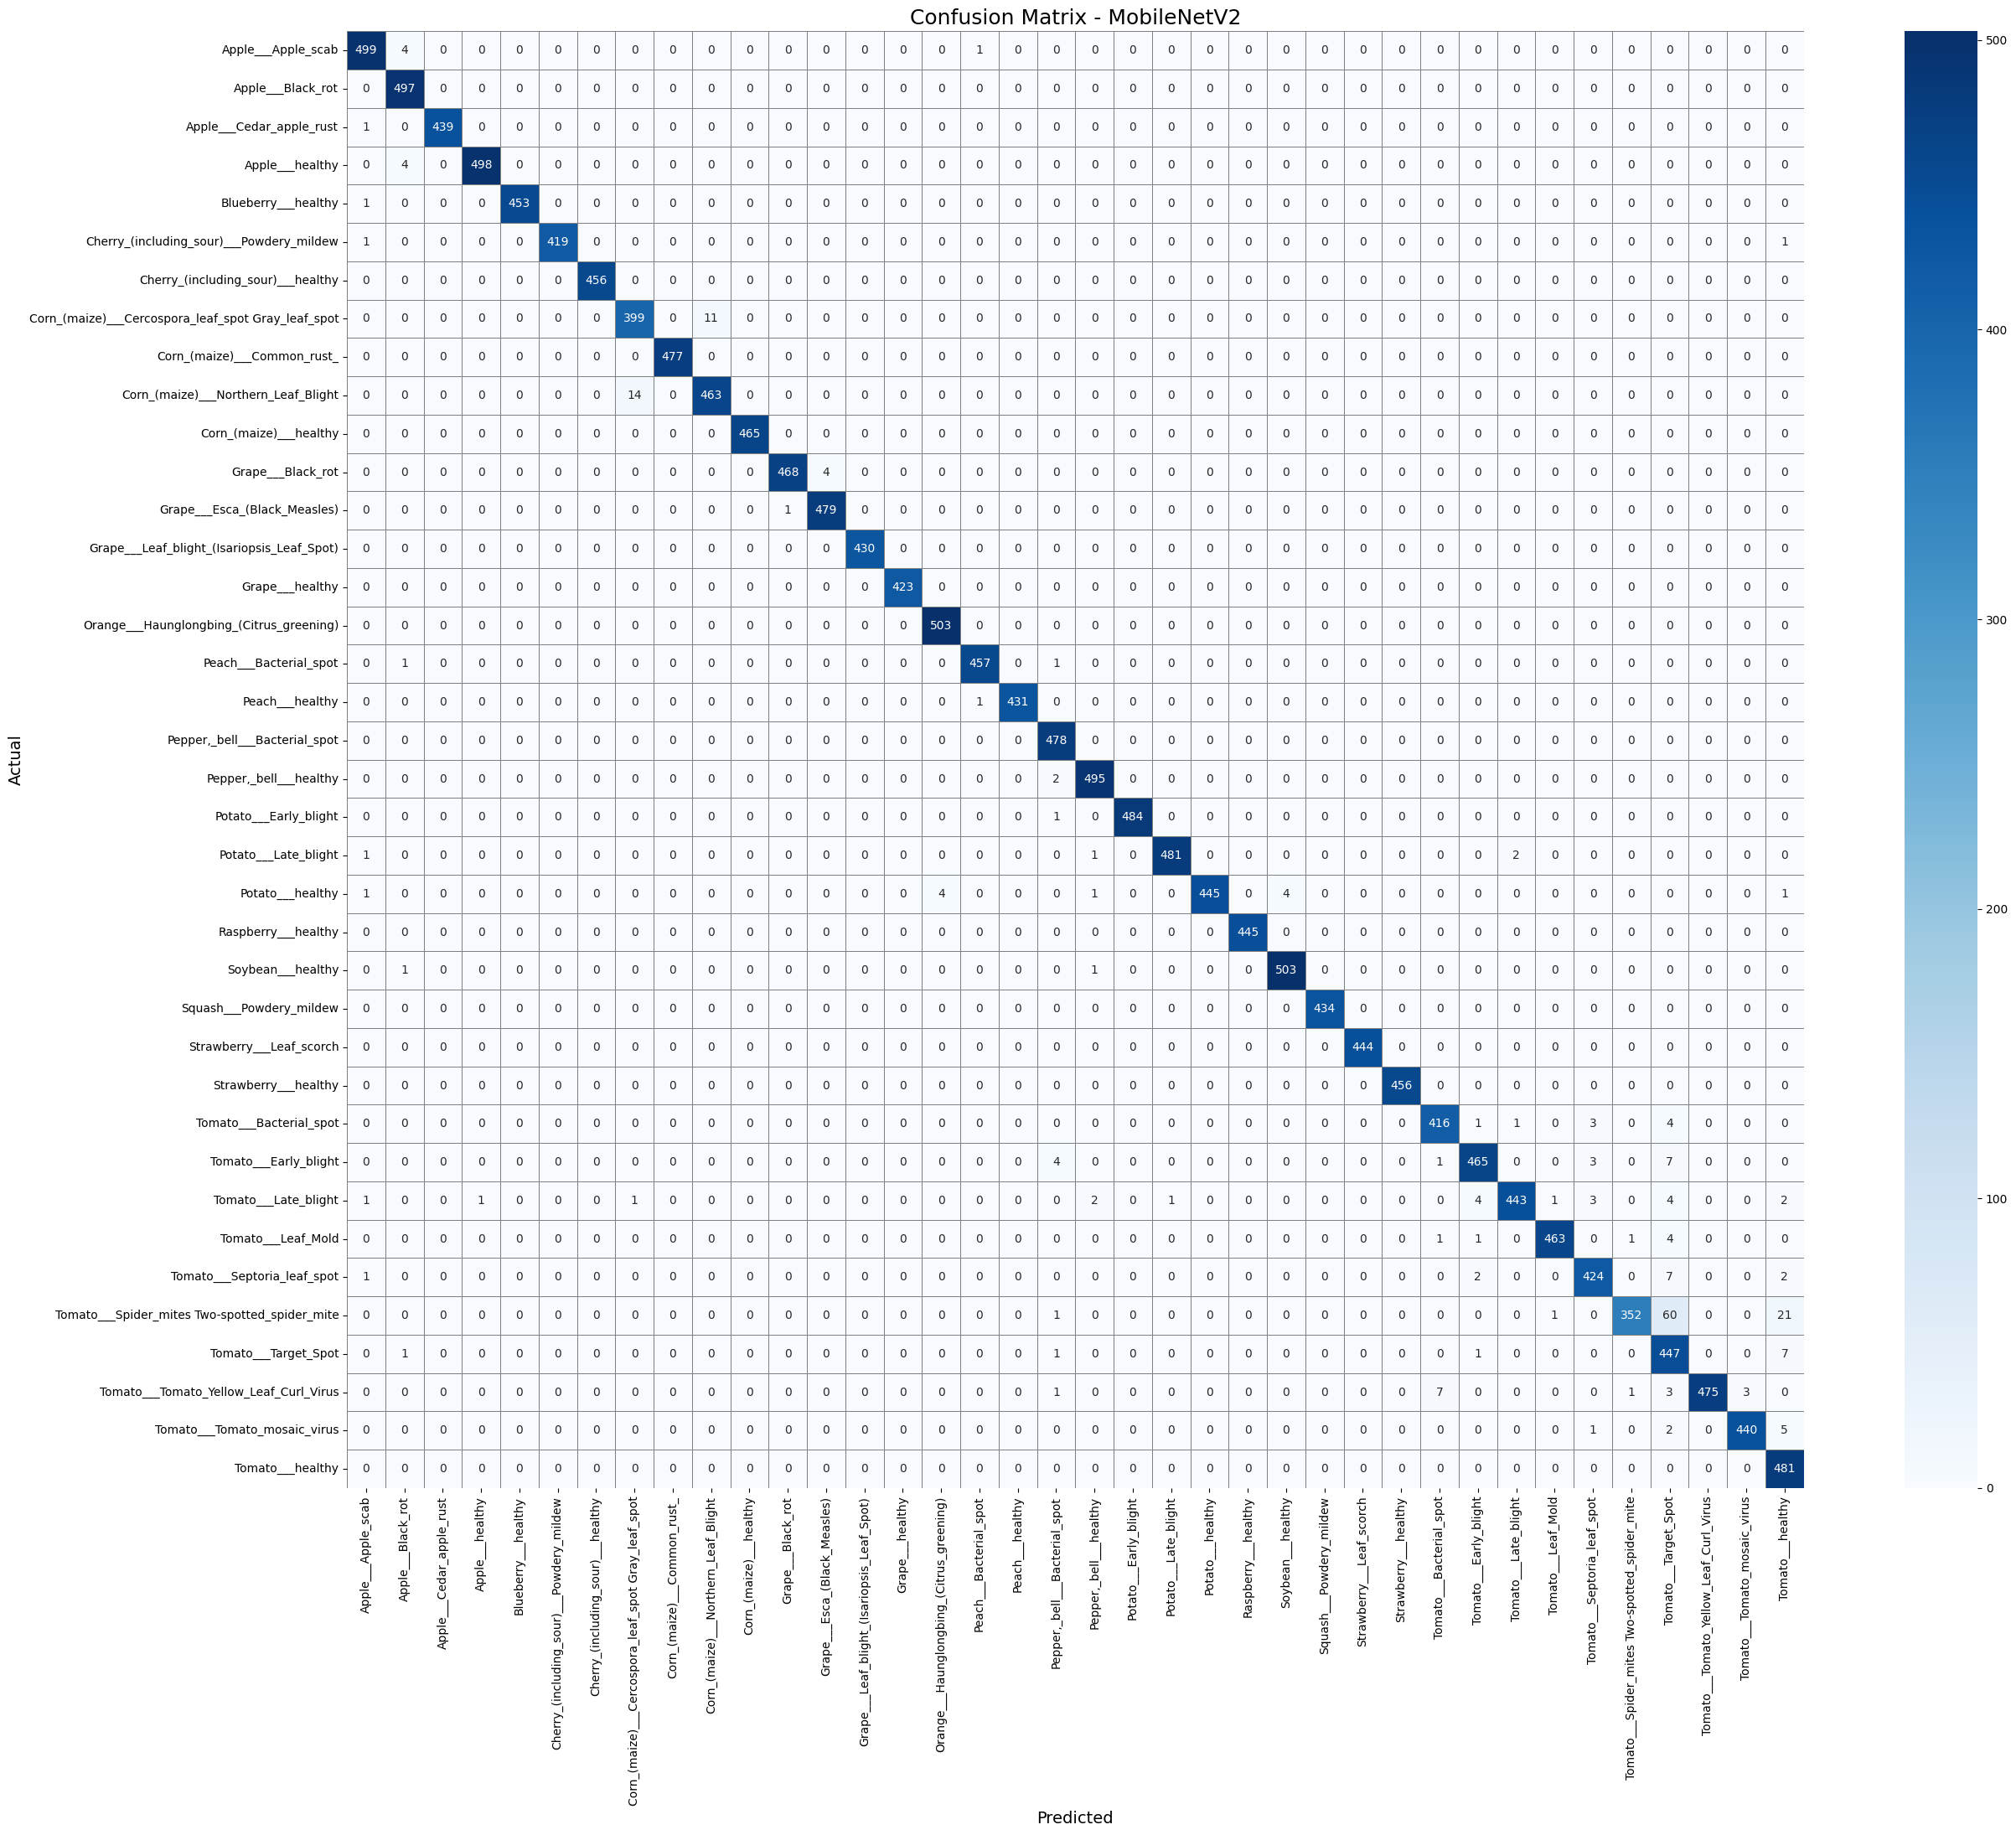

In [21]:
# ✅ Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(28, 22))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix - MobileNetV2", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(EVAL_DIR, "confusion_matrix_mobilenetv2.png"))
plt.show()

# DenseNet121 Evaluation

In [22]:
# Load Model
DenseNet121_model_path = r"D:\Crop_disease_detection\models\DenseNet121\model_DenseNet121\best_model_densenet121.h5"
model = load_model(DenseNet121_model_path)

In [23]:
# ✅ Evaluation
true_labels = val_loader.classes
class_names = list(val_loader.class_indices.keys())
pred_probs = model.predict(val_loader)
pred_labels = np.argmax(pred_probs, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 1486s 3s/step


In [24]:
# ✅ Generate Classification Report
report = classification_report(true_labels, pred_labels, target_names=class_names, digits=4)
print(report)

# ✅ Save Classification Report as PNG
fig, ax = plt.subplots(figsize=(14, len(class_names) * 0.35))   
ax.axis('off')
ax.text(0.01, 1.0, f"Classification Report for DenseNet121\n\n" + report, {'fontsize': 9}, fontproperties='monospace')
plt.tight_layout()
plt.savefig(os.path.join(EVAL_DIR, "classification_report_densenet121.png"))
plt.close()


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     0.9960    0.9980    0.9970       504
                                 Apple___Black_rot     0.9980    1.0000    0.9990       497
                          Apple___Cedar_apple_rust     1.0000    0.9977    0.9989       440
                                   Apple___healthy     0.9960    0.9960    0.9960       502
                               Blueberry___healthy     0.9869    0.9978    0.9923       454
          Cherry_(including_sour)___Powdery_mildew     0.9976    0.9976    0.9976       421
                 Cherry_(including_sour)___healthy     1.0000    1.0000    1.0000       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.9898    0.9463    0.9676       410
                       Corn_(maize)___Common_rust_     0.9958    1.0000    0.9979       477
               Corn_(maize)___Northern_Leaf_Blight     0.9574    0.9895    0.97

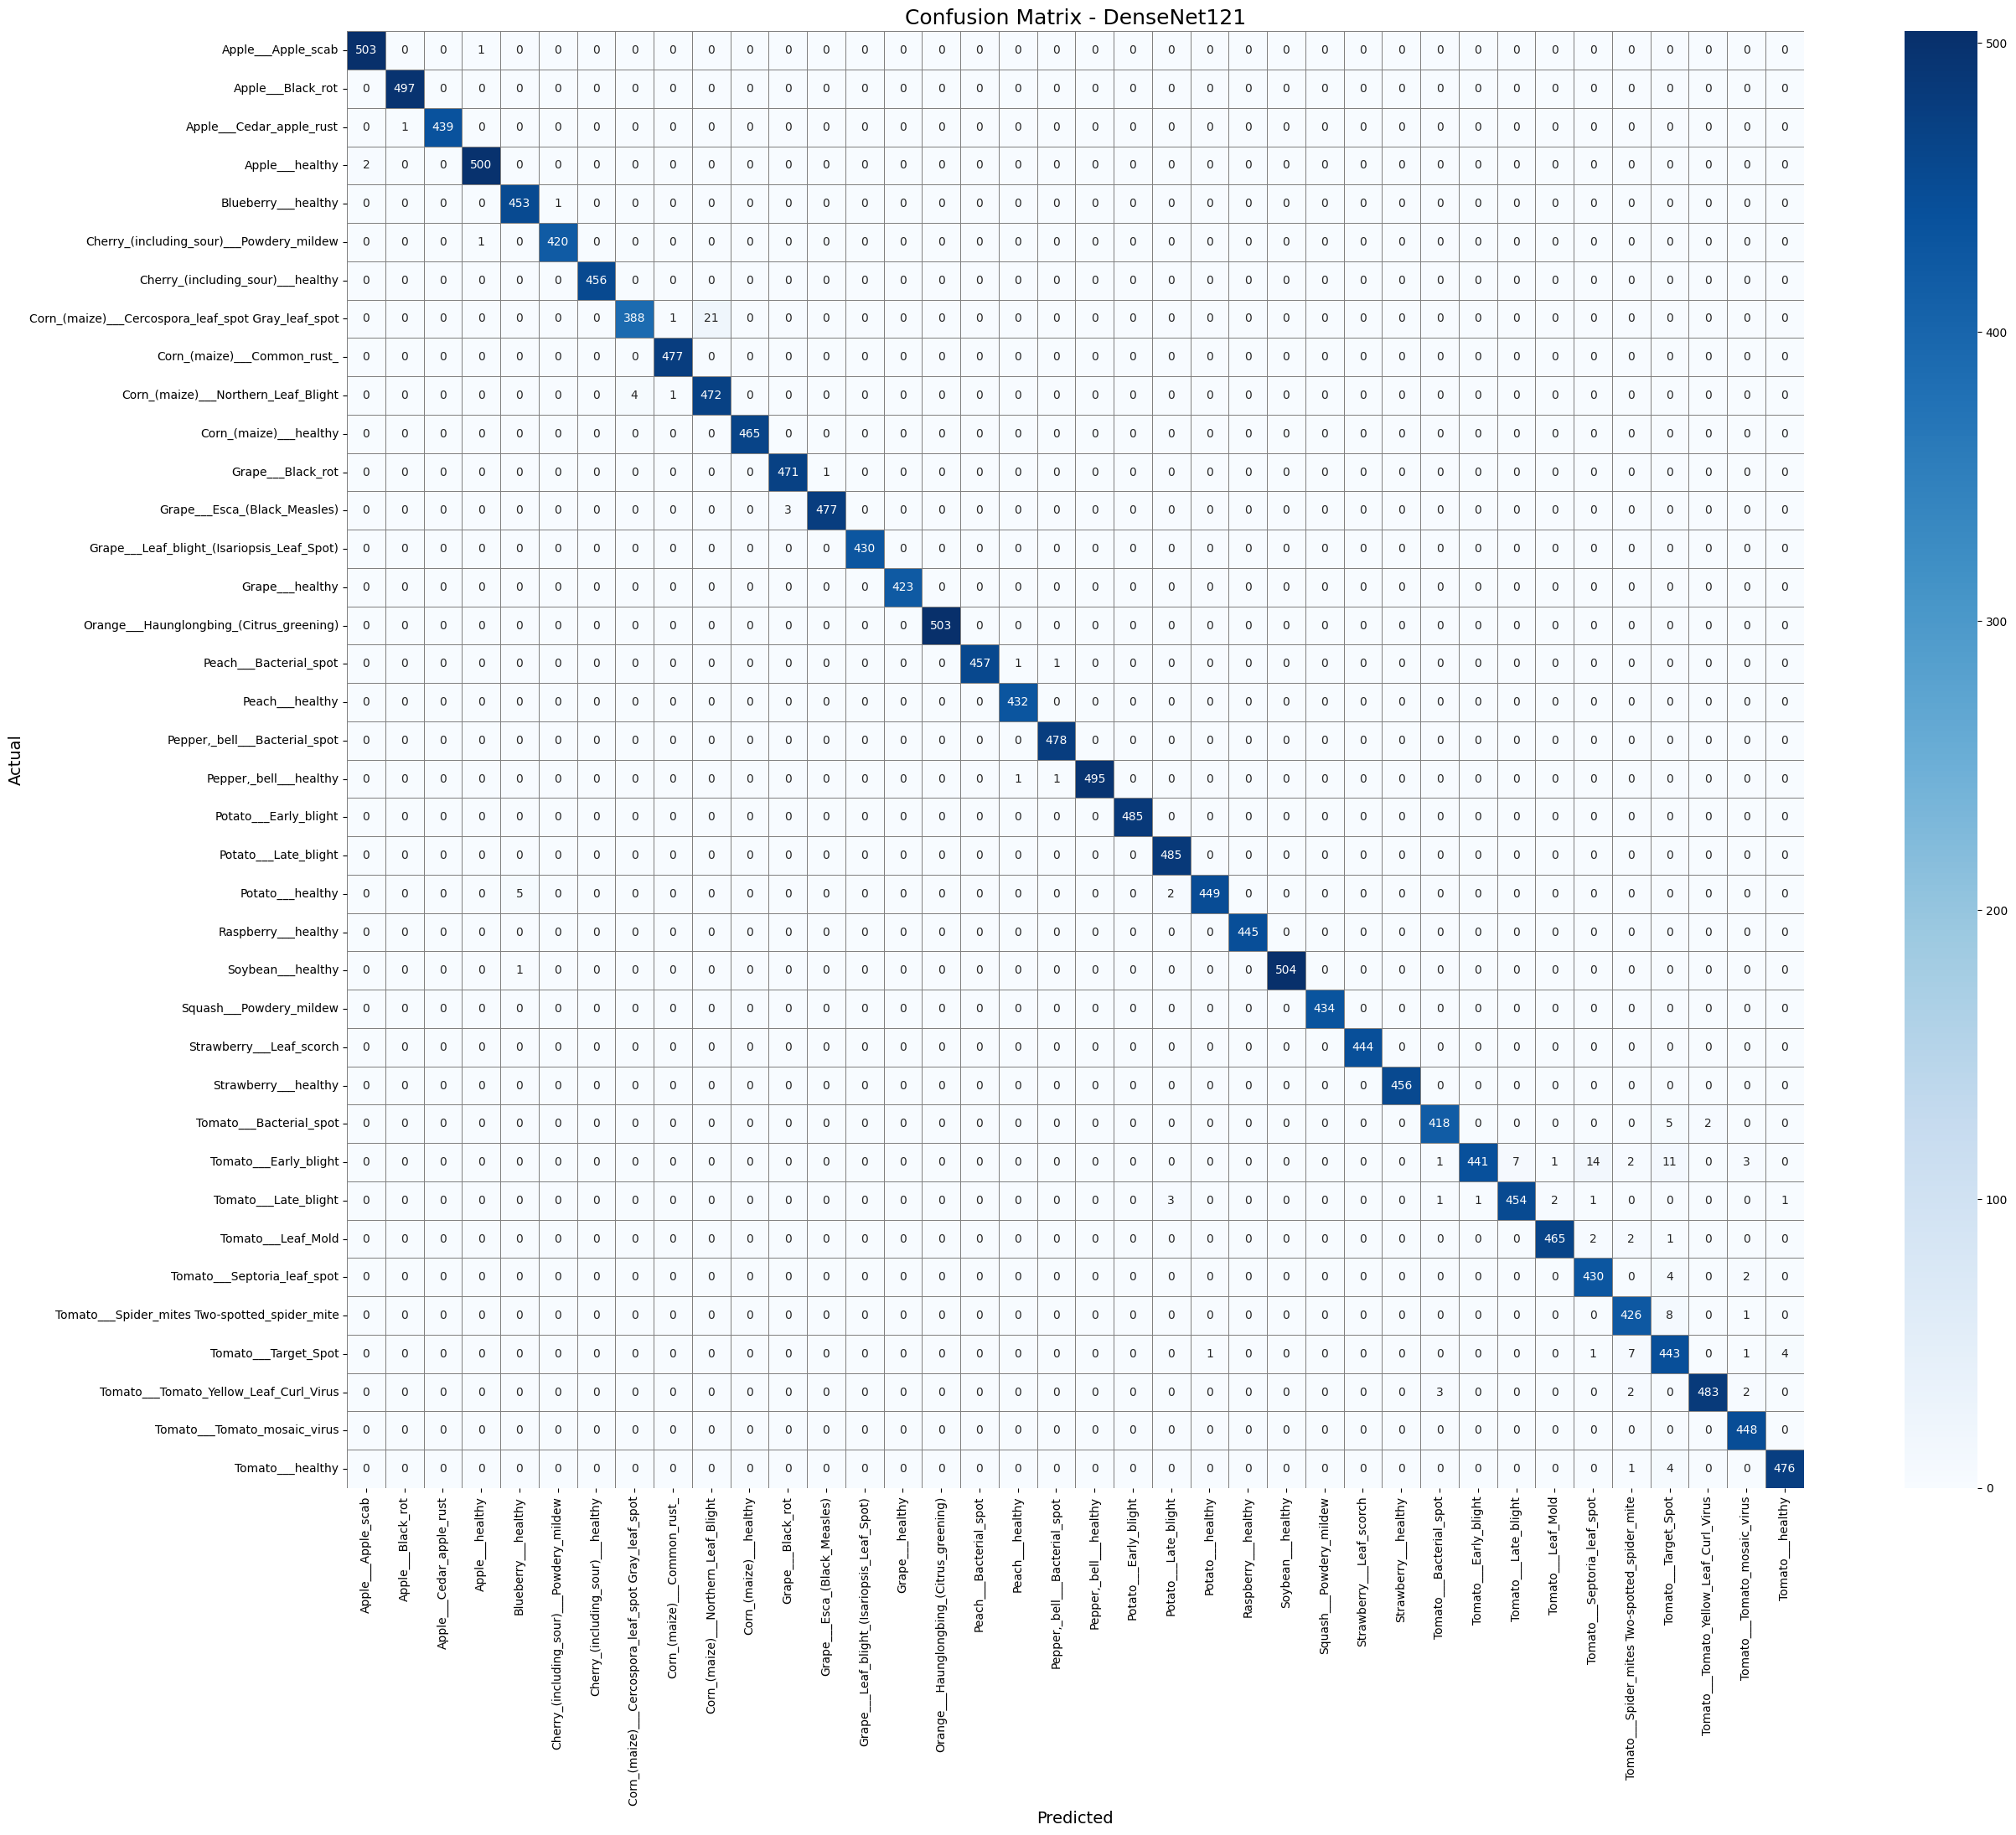

In [25]:
# ✅ Save Confusion Matrix as PNG
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(28, 22))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar=True, square=True, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix - DenseNet121", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(EVAL_DIR, "confusion_matrix_densenet121.png"))
plt.show()